In [125]:
# Basic ML/predictive modeling exercise
#
# Using voting record data set from UCI machine learning repository located at
# http://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/
#
# Import libraries

import numpy as np
import pandas as pd
import sklearn as skl
import matplotlib as plt
%matplotlib inline 

# Load data
path = "house-votes-84.data"
df = pd.read_csv(path, header = None)

# Split data into training and test sets
np.random.seed(123)
indices = np.random.permutation(len(df))
half_index = int(len(indices)/2)

# Odd number of observations
test = df.iloc[indices[:half_index],:]
train = df.iloc[indices[half_index:],:]

test_features = test.iloc[:,1:]
test_targets = test.iloc[:,0]
train_features = train.iloc[:,1:]
train_targets = train.iloc[:,0]


In [126]:
# Transform categorical variables
print(train_features[:1])
le = skl.preprocessing.LabelEncoder()
for i in range(1,len(train.columns)):
    train_features.loc[:,i] = le.fit_transform(train_features[i])
    test_features.loc[:,i] = le.fit_transform(test_features[i])

# This throws a SettingWithCopyWarning but it's a false positive,
# compare the two lines that are printed, the correspondance works as it's supposed to
print(train_features[:1])

C:\Users\matt\Anaconda3\lib\site-packages\pandas\core\indexing.py:508: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value
C:\Users\matt\Anaconda3\lib\site-packages\pandas\core\indexing.py:426: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


    1  2  3  4  5  6  7  8  9  10 11 12 13 14 15 16
367  y  y  y  n  y  y  y  y  n  y  y  n  n  n  y  ?
     1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16
367   2   2   2   1   2   2   2   2   1   2   2   1   1   1   2   0


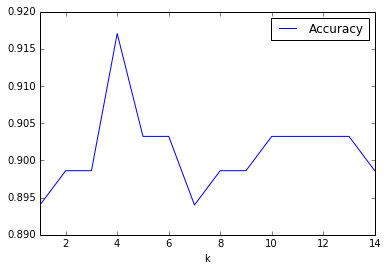

In [127]:
# Fit a knn model and scan over different values of k
acc_vals = pd.DataFrame(columns = ('k', 'Accuracy'))
for k in range(1,15):
    model = skl.neighbors.KNeighborsClassifier(n_neighbors = k, algorithm = 'ball_tree')
    fitted = model.fit(train_features, train_targets)
    predicted = fitted.predict(test_features)
    acc = skl.metrics.accuracy_score(predicted, test_targets)
    acc_vals.loc[k-1] = (k, acc)          

acc_vals.plot(x = 'k', y = 'Accuracy')

Optimal C occurred at 32
Optimal gamma occurred at 0.039
Accuracy of model with optimal C and gamma is 0.94930875576
This is lower than with C = 32 and auto selected gamma


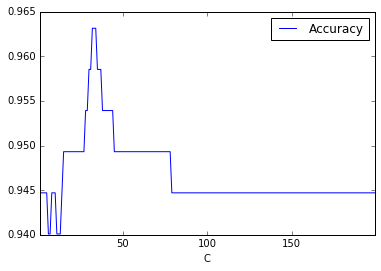

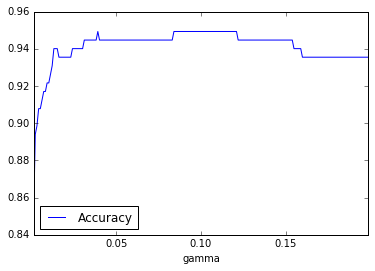

In [149]:
# Perform the same exercise but use a SVM instead of knn model
acc_vals = pd.DataFrame(columns = ('C', 'Accuracy'))

for k in range(1,200):
    model = skl.svm.SVC(C = k)
    fitted = model.fit(train_features, train_targets)
    predicted = fitted.predict(test_features)
    acc = skl.metrics.accuracy_score(predicted, test_targets)
    acc_vals.loc[k-1] = (k, acc)
    
    if(k == 1):
        maxAcc = acc
        maxIndex = k
        
    if(acc > maxAcc):
        maxAcc = acc
        maxIndex = k

acc_vals.plot(x = 'C', y = 'Accuracy')
print("Optimal C occurred at " + str(maxIndex))

acc_vals = pd.DataFrame(columns = ('gamma', 'Accuracy'))
for k in range(1,200):
    loopGamma = k*.001
    model = skl.svm.SVC(gamma = loopGamma)
    fitted = model.fit(train_features, train_targets)
    predicted = fitted.predict(test_features)
    acc = skl.metrics.accuracy_score(predicted, test_targets)
    acc_vals.loc[k-1] = (loopGamma, acc)
    
    if(k == 1):
        maxAcc = acc
        maxIndex = k
        maxGamma = loopGamma
    if(acc > maxAcc):
        maxAcc = acc
        maxIndex = k
        maxGamma = loopGamma

acc_vals.plot(x = 'gamma', y = 'Accuracy')
print("Optimal gamma occurred at " + str(maxGamma))

# See what happens when you combine those optimal values
model = skl.svm.SVC(C = 32, gamma = .1)
fitted = model.fit(train_features, train_targets)
predicted = fitted.predict(test_features)
acc = skl.metrics.accuracy_score(predicted, test_targets)
print("Accuracy of model with optimal C and gamma is " + str(acc))
print("This is lower than with C = 32 and auto selected gamma")

In [ ]:
# Let's use scikit-learn's included scanning functions to try to reproduce the plot above
# TODO